## 1. Data Prep

### 0. Wrong data (IGNORE THIS)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [22]:
# prepare X and Y data

X_df = pd.read_csv('weekly_X.csv')

Y_df = pd.read_csv('weekly_Y.csv')

In [23]:
# merge X and Y on week_start to panel data for forecasting
panel = X_df.merge(Y_df, on="week_start", how="left")

panel.head()

,week_start,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_379,emb_380,emb_381,emb_382,emb_383,event_count,material_conflict,verbal_conflict,material_cooperation,event_indicator
0,2009-01-19,-0.045204,0.018496,0.013108,-0.018923,0.001200,0.036574,0.009977,-0.032701,-0.015682,...,0.003664,0.033935,-0.019575,-0.018941,-0.022322,NaN,NaN,NaN,NaN,NaN
1,2009-01-26,-0.044319,0.001339,0.054772,-0.010097,0.014390,0.035906,0.009485,-0.018188,-0.039000,...,0.004700,0.034958,-0.020540,-0.016148,-0.008494,NaN,NaN,NaN,NaN,NaN
2,2009-02-02,-0.032229,0.014760,0.050257,-0.000665,0.025203,0.043789,-0.001321,-0.032409,-0.027196,...,-0.012379,0.033260,-0.018252,-0.022531,-0.008228,NaN,NaN,NaN,NaN,NaN
3,2009-02-09,-0.014153,0.007285,0.056394,-0.038718,0.027836,0.030470,0.012534,-0.028295,-0.055590,...,-0.008979,0.049636,0.018318,-0.033795,-0.019044,NaN,NaN,NaN,NaN,NaN
4,2009-02-16,-0.026900,-0.003368,0.083931,-0.019567,-0.003839,0.027099,-0.006140,-0.012465,-0.060518,...,-0.004018,0.032267,-0.013373,-0.035396,-0.014253,NaN,NaN,NaN,NaN,NaN


In [27]:
# mark the missing Y value as no event occurred
panel['event_indicator'] = panel['event_indicator'].fillna(0)
panel['material_conflict'] = panel['material_conflict'].fillna(0)
panel['verbal_conflict'] = panel['verbal_conflict'].fillna(0)
panel['material_cooperation'] = panel['material_cooperation'].fillna(0)

In [28]:
panel

,week_start,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_379,emb_380,emb_381,emb_382,emb_383,event_count,material_conflict,verbal_conflict,material_cooperation,event_indicator
0,2009-01-19,-0.045204,0.018496,0.013108,-0.018923,0.001200,0.036574,0.009977,-0.032701,-0.015682,...,0.003664,0.033935,-0.019575,-0.018941,-0.022322,NaN,0.0,0.0,0.0,0.0
1,2009-01-26,-0.044319,0.001339,0.054772,-0.010097,0.014390,0.035906,0.009485,-0.018188,-0.039000,...,0.004700,0.034958,-0.020540,-0.016148,-0.008494,NaN,0.0,0.0,0.0,0.0
2,2009-02-02,-0.032229,0.014760,0.050257,-0.000665,0.025203,0.043789,-0.001321,-0.032409,-0.027196,...,-0.012379,0.033260,-0.018252,-0.022531,-0.008228,NaN,0.0,0.0,0.0,0.0
3,2009-02-09,-0.014153,0.007285,0.056394,-0.038718,0.027836,0.030470,0.012534,-0.028295,-0.055590,...,-0.008979,0.049636,0.018318,-0.033795,-0.019044,NaN,0.0,0.0,0.0,0.0
4,2009-02-16,-0.026900,-0.003368,0.083931,-0.019567,-0.003839,0.027099,-0.006140,-0.012465,-0.060518,...,-0.004018,0.032267,-0.013373,-0.035396,-0.014253,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,2025-09-15,-0.036825,0.007341,0.072993,-0.042871,0.038023,0.020813,0.001706,-0.034032,-0.045421,...,0.007718,0.033371,-0.014807,-0.020437,0.014118,NaN,0.0,0.0,0.0,0.0
870,2025-09-22,-0.037801,0.017146,0.068939,-0.039297,0.034568,0.001766,-0.000465,-0.030631,-0.023582,...,0.018270,0.055007,-0.037194,-0.031585,0.018238,NaN,0.0,0.0,0.0,0.0
871,2025-09-29,-0.037745,0.021054,0.061797,-0.030915,0.037317,0.029666,-0.014560,-0.007419,-0.040623,...,0.001833,0.031996,-0.050999,-0.024111,0.017520,NaN,0.0,0.0,0.0,0.0
872,2025-10-06,-0.013393,0.034157,0.082958,0.017842,0.057596,0.053825,-0.023098,0.004096,-0.060786,...,-0.008551,0.065205,-0.048230,-0.008707,0.040265,NaN,0.0,0.0,0.0,0.0


### 1.1 Aggreagte into weekly level

In [8]:
panel = pd.read_csv("panel_aligned_raw_for_model.csv")

In [9]:
# convert date to week_start
panel["date"] = pd.to_datetime(panel["date"])
panel["week_start"] = panel["date"].dt.to_period("W").apply(lambda r: r.start_time)

In [10]:
# aggregate to weekly data
panel = panel.groupby("week_start").agg({
    'sentiment_weighted': 'mean',
    'sentiment_score': 'mean',
    'event_conflict_share': 'mean'
}).reset_index()

In [6]:
panel.to_csv("weekly.csv")

### 1.2 Aggregate into monthly level

### Split the training and testing sample

In [13]:
# prepare X and Y for modelin
# Attempt 1: event as X and sentiment as Y

'''
# use embedding columns and event counts as X features
emb_cols = [c for c in panel.columns if c.startswith("emb_")]
feature_cols = emb_cols + [
    "event_count",
    "material_conflict",
    "verbal_conflict",
    "material_cooperation",
]'''


X = panel["event_conflict_share"]
y = panel["sentiment_weighted"]

In [ ]:
# Attempt 1: event as Y and sentiment as X
y = panel["event_conflict_share"]
X = panel["sentiment_weighted"]

In [9]:
# Split train and test set based on time series

SPLIT_DATE = "2020-01-01"

train = panel[panel.week_start < SPLIT_DATE]
test  = panel[panel.week_start >= SPLIT_DATE]

X_train = train["event_conflict_share"]
y_train = train["sentiment_weighted"]

X_test = test["event_conflict_share"]
y_test = test["sentiment_weighted"]

## 2. OLS

                            OLS Regression Results                            
Dep. Variable:     sentiment_weighted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07365
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.786
Time:                        20:11:21   Log-Likelihood:                -750.20
No. Observations:                 755   AIC:                             1504.
Df Residuals:                     753   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2066 

C:\Users\ziyus\AppData\Local\Temp\ipykernel_16396\3883183868.py:19: RuntimeWarning: invalid value encountered in log1p
  X_series = pd.Series(np.log1p(X_scaled), index=X_series.index, name=X_series.name)
C:\Users\ziyus\AppData\Local\Temp\ipykernel_16396\3883183868.py:20: RuntimeWarning: invalid value encountered in log1p
  y_series = pd.Series(np.log1p(y_scaled), index=y_series.index, name=y_series.name)


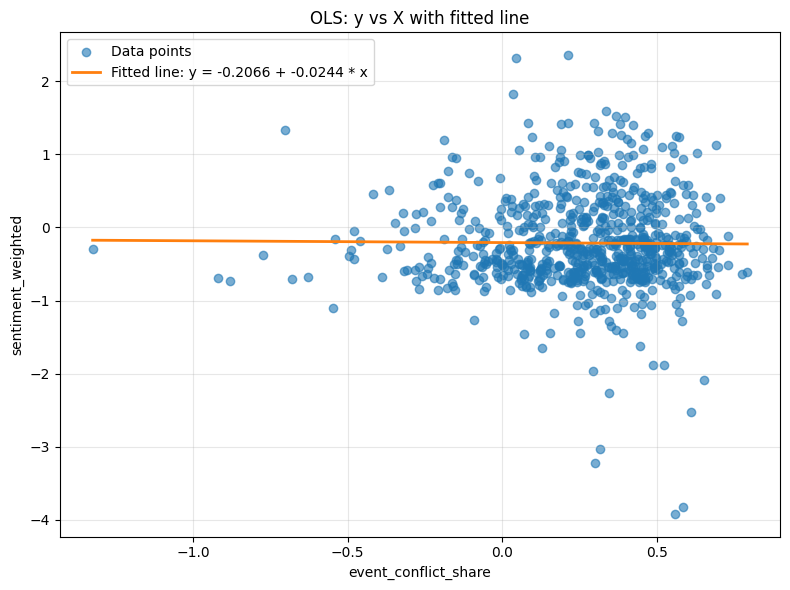

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import matplotlib.pyplot as plt

# use existing X and y Series from the notebook
X_series = X.astype(float)
y_series = y.astype(float)
# Scale X and y, then apply log transformation

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_series.values.reshape(-1, 1)).flatten()
y_scaled = scaler_y.fit_transform(y_series.values.reshape(-1, 1)).flatten()

X_series = pd.Series(np.log1p(X_scaled), index=X_series.index, name=X_series.name)
y_series = pd.Series(np.log1p(y_scaled), index=y_series.index, name=y_series.name)
# Check if X has variation. If not, fit intercept-only model.
if X_series.std() < 1e-12:
    X_design = pd.DataFrame({"const": np.ones(len(X_series))})
    model = sm.OLS(y_series, X_design).fit()
    print("X has no variation. Fitting intercept-only model.\n")
else:
    X_design = sm.add_constant(X_series)
    # Remove rows with NaN values in either X or y
    valid_idx = ~(X_series.isna() | y_series.isna())
    X_clean = X_series[valid_idx]
    y_clean = y_series[valid_idx]

    X_design = sm.add_constant(X_clean)
    model = sm.OLS(y_clean, X_design).fit()

# Print OLS results summary
print(model.summary())

# Plot data points and fitted line
plt.figure(figsize=(8,6))
plt.scatter(X_series, y_series, alpha=0.6, label="Data points", color="C0")

# Create fitted line
if X_series.std() < 1e-12:
    intercept = model.params[0]
    plt.hlines(intercept, X_series.min(), X_series.max(), colors="C1", lw=2, label=f"Fitted intercept = {intercept:.4f}")
else:
    xvals = np.linspace(X_series.min(), X_series.max(), 200)
    params = model.params
    yvals = params["const"] + params[X_series.name] * xvals
    plt.plot(xvals, yvals, color="C1", lw=2, label=f"Fitted line: y = {params['const']:.4f} + {params[X_series.name]:.4f} * x")

plt.xlabel(X_series.name)
plt.ylabel(y_series.name)
plt.title("OLS: y vs X with fitted line")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 3. XGBoost

Predict does the official statment is predictive for the next week US-China event.

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [11]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos if pos > 0 else 1.0
print("scale_pos_weight:", scale_pos_weight)

clf = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=3))
print("Test AUC:", roc_auc_score(y_test, y_prob))

scale_pos_weight: 1.0


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533], got [-1.58005987e+01 -6.13816409e+00 -5.87209759e+00 -4.57959103e+00
 -3.09274847e+00 -2.97533822e+00 -1.89262585e+00 -1.60341096e+00
 -1.32309585e+00 -1.26710846e+00 -1.24199442e+00 -1.18843878e+00
 -1.06727435e+00 -1.03498589e+00 -9.53321563e-01 -9.16220129e-01
 -6.57222956e-01 -6.53971657e-01 -5.24287252e-01 -5.24215908e-01
 -5.10125708e-01 -4.22157491e-01 -3.86009591e-01 -3.54595840e-01
 -3.44653097e-01 -3.17703858e-01 -3.13338533e-01 -3.09442909e-01
 -2.86067379e-01 -2.70189292e-01 -2.13469003e-01 -1.73604643e-01
 -1.51057895e-01 -1.48153291e-01 -1.44973077e-01 -1.34203833e-01
 -1.13622273e-01 -1.05178653e-01 -8.43995102e-02 -7.79638663e-02
 -7.07683063e-02 -6.17270746e-02 -6.15736432e-02 -5.73836491e-02
 -2.75949463e-02 -2.07028985e-02 -1.07057728e-02 -8.89997650e-03
  3.46242583e-04  3.27014923e-03  8.86340333e-03  1.51967406e-02
  2.89666067e-02  6.41959682e-02  8.05862110e-02  8.56953207e-02
  9.29236151e-02  9.83431153e-02  1.04900703e-01  1.06271744e-01
  1.06419735e-01  1.13139631e-01  1.14453353e-01  1.20011358e-01
  1.22138180e-01  1.23459906e-01  1.23732168e-01  1.24383257e-01
  1.33955825e-01  1.37169442e-01  1.40705511e-01  1.42427550e-01
  1.44664691e-01  1.45060649e-01  1.48943953e-01  1.49571040e-01
  1.49586091e-01  1.52149832e-01  1.52488807e-01  1.58649402e-01
  1.63408197e-01  1.65422221e-01  1.67662293e-01  1.73167843e-01
  1.74660272e-01  1.74990582e-01  1.77404694e-01  1.77874163e-01
  1.80875028e-01  1.82609991e-01  2.09194150e-01  2.11497280e-01
  2.13874054e-01  2.14372353e-01  2.16785320e-01  2.20855736e-01
  2.22113856e-01  2.22810306e-01  2.26668900e-01  2.35107489e-01
  2.40661286e-01  2.41752345e-01  2.44822741e-01  2.47361839e-01
  2.53134916e-01  2.53313756e-01  2.54190492e-01  2.54870614e-01
  2.64005832e-01  2.64710548e-01  2.67320558e-01  2.69848742e-01
  2.70172565e-01  2.71914106e-01  2.73758581e-01  2.76564803e-01
  2.88305019e-01  2.91100487e-01  2.91118384e-01  2.91803781e-01
  2.98980121e-01  3.00105054e-01  3.01107172e-01  3.02442566e-01
  3.02977875e-01  3.12740645e-01  3.14527820e-01  3.18942790e-01
  3.24602678e-01  3.25699326e-01  3.26622145e-01  3.30802010e-01
  3.33490586e-01  3.33545344e-01  3.34644053e-01  3.39186659e-01
  3.40395325e-01  3.40750328e-01  3.40970829e-01  3.42071358e-01
  3.51816576e-01  3.51972243e-01  3.64355940e-01  3.64382353e-01
  3.68870503e-01  3.75359099e-01  3.78254308e-01  3.91655638e-01
  3.97078763e-01  3.97298712e-01  3.99335090e-01  4.03292328e-01
  4.04050495e-01  4.09039646e-01  4.12024081e-01  4.14597899e-01
  4.15176799e-01  4.15898440e-01  4.19549451e-01  4.24118246e-01
  4.24834695e-01  4.27777164e-01  4.39119069e-01  4.41440872e-01
  4.41454741e-01  4.42856088e-01  4.45140202e-01  4.46590247e-01
  4.48372555e-01  4.49709732e-01  4.50699899e-01  4.51752502e-01
  4.58670229e-01  4.58753988e-01  4.59851690e-01  4.71239879e-01
  4.72681946e-01  4.74384254e-01  4.83188543e-01  4.87456799e-01
  4.92315578e-01  4.92438309e-01  4.92811213e-01  4.97396205e-01
  4.99028955e-01  5.01623740e-01  5.03372547e-01  5.04656279e-01
  5.06216936e-01  5.08483767e-01  5.16926200e-01  5.19434977e-01
  5.25290217e-01  5.28558321e-01  5.36820083e-01  5.40928237e-01
  5.41028102e-01  5.44933535e-01  5.52315554e-01  5.58998597e-01
  5.65959545e-01  5.67158347e-01  5.68139554e-01  5.68434185e-01
  5.74394912e-01  5.75903691e-01  5.81259623e-01  5.82651846e-01
  5.89418043e-01  5.93586251e-01  5.95879214e-01  5.96116211e-01
  6.04239505e-01  6.05306525e-01  6.08448324e-01  6.16533943e-01
  6.19547519e-01  6.26844221e-01  6.27103310e-01  6.29203492e-01
  6.29575179e-01  6.32209487e-01  6.33472446e-01  6.35350747e-01
  6.46660794e-01  6.52377206e-01  6.54354038e-01  6.80637848e-01
  6.82098896e-01  6.87114835e-01  6.92730450e-01  7.00404996e-01
  7.02443032e-01  7.02448230e-01  7.06946793e-01  7.10682313e-01
  7.17509353e-01  7.18472295e-01  7.22618532e-01  7.30343684e-01
  7.39658720e-01  7.50890663e-01  7.56094614e-01  7.56939877e-01
  7.59982169e-01  7.64306489e-01  7.69447867e-01  7.73598234e-01
  7.73704734e-01  7.78871650e-01  7.81747911e-01  7.86073412e-01
  7.86491543e-01  7.87073481e-01  7.94015126e-01  7.97481936e-01
  8.09698879e-01  8.12266793e-01  8.40808074e-01  8.40815175e-01
  8.40957540e-01  8.50877161e-01  8.60778603e-01  8.61799758e-01
  8.63513026e-01  8.68881349e-01  8.71326685e-01  8.72550223e-01
  8.83368086e-01  8.85876472e-01  8.91407495e-01  8.92306522e-01
  9.07225876e-01  9.09890890e-01  9.13321435e-01  9.20268070e-01
  9.34238929e-01  9.34539643e-01  9.37492265e-01  9.43512860e-01
  9.48167078e-01  9.52440825e-01  9.63184354e-01  9.72853358e-01
  9.73102416e-01  9.75459645e-01  9.76220742e-01  9.79649101e-01
  9.83043195e-01  9.83400621e-01  9.85928310e-01  9.91203488e-01
  9.98493484e-01  1.00433092e+00  1.01052293e+00  1.01636297e+00
  1.02036507e+00  1.02073426e+00  1.02360482e+00  1.02532977e+00
  1.03565358e+00  1.03639716e+00  1.04222123e+00  1.04662728e+00
  1.05207162e+00  1.06037910e+00  1.06162176e+00  1.07202665e+00
  1.08217238e+00  1.08547460e+00  1.08806901e+00  1.09084602e+00
  1.09355708e+00  1.09574017e+00  1.11064466e+00  1.11230969e+00
  1.12670886e+00  1.12860491e+00  1.13266037e+00  1.14188190e+00
  1.14926806e+00  1.16874172e+00  1.17038712e+00  1.17934470e+00
  1.18313213e+00  1.18626520e+00  1.19278468e+00  1.20125435e+00
  1.20943435e+00  1.21138350e+00  1.22161299e+00  1.22793544e+00
  1.23404310e+00  1.24068637e+00  1.25790630e+00  1.26723499e+00
  1.26858692e+00  1.27199386e+00  1.27534814e+00  1.27807962e+00
  1.27989509e+00  1.29266704e+00  1.29407640e+00  1.32485835e+00
  1.34661068e+00  1.34865251e+00  1.35610097e+00  1.35907940e+00
  1.36270857e+00  1.38440564e+00  1.38683330e+00  1.38826191e+00
  1.41755733e+00  1.42245059e+00  1.42669989e+00  1.45407311e+00
  1.46552948e+00  1.47054400e+00  1.47055056e+00  1.47194711e+00
  1.48182275e+00  1.49069728e+00  1.50664078e+00  1.51705396e+00
  1.52952097e+00  1.53412793e+00  1.55237948e+00  1.55999855e+00
  1.56603741e+00  1.56870888e+00  1.57146530e+00  1.61142696e+00
  1.64944673e+00  1.68943570e+00  1.69885118e+00  1.71520526e+00
  1.72670302e+00  1.73647956e+00  1.73925546e+00  1.74519754e+00
  1.75277827e+00  1.76564757e+00  1.77560643e+00  1.79831350e+00
  1.80984705e+00  1.81044640e+00  1.83218059e+00  1.86451713e+00
  1.88760406e+00  1.88952866e+00  1.89672100e+00  1.90396362e+00
  1.90797050e+00  1.95427146e+00  1.96348854e+00  1.98865346e+00
  2.00008444e+00  2.04270261e+00  2.04913620e+00  2.05895467e+00
  2.06615711e+00  2.07981947e+00  2.11649514e+00  2.13964297e+00
  2.14801640e+00  2.14917317e+00  2.16992921e+00  2.17572439e+00
  2.18980520e+00  2.19783570e+00  2.20137901e+00  2.30191024e+00
  2.31004649e+00  2.34180972e+00  2.34349038e+00  2.35462222e+00
  2.36482936e+00  2.36804570e+00  2.37616251e+00  2.38312044e+00
  2.39567995e+00  2.45016258e+00  2.45368187e+00  2.51873960e+00
  2.60019849e+00  2.60336073e+00  2.62815920e+00  2.63332945e+00
  2.63381683e+00  2.66510960e+00  2.67232760e+00  2.67804248e+00
  2.68584844e+00  2.69487472e+00  2.74568647e+00  2.75129990e+00
  2.77417946e+00  2.79136041e+00  2.82454076e+00  2.84933041e+00
  2.91952082e+00  2.92116563e+00  2.94496376e+00  2.95996319e+00
  3.00595583e+00  3.03691900e+00  3.13596723e+00  3.13777101e+00
  3.17951770e+00  3.22426603e+00  3.23594762e+00  3.25291015e+00
  3.27951230e+00  3.29362369e+00  3.30029585e+00  3.30308520e+00
  3.30677653e+00  3.30922841e+00  3.31033232e+00  3.35788380e+00
  3.38519706e+00  3.41584783e+00  3.48331149e+00  3.49361127e+00
  3.57536074e+00  3.62774966e+00  3.62987847e+00  3.65430153e+00
  3.78972677e+00  3.98776760e+00  3.99281905e+00  4.01778096e+00
  4.02438977e+00  4.07990840e+00  4.10988422e+00  4.17843803e+00
  4.19085118e+00  4.26119806e+00  4.30021438e+00  4.32231836e+00
  4.34493367e+00  4.40259841e+00  4.50141933e+00  4.58826291e+00
  4.72041993e+00  4.79000864e+00  4.82287685e+00  5.05461939e+00
  5.12569554e+00  5.25124573e+00  5.41265386e+00  5.44390314e+00
  5.74182117e+00  5.87280508e+00  5.88638261e+00  6.01150308e+00
  6.12588235e+00  6.27988127e+00  6.28340649e+00  6.31689970e+00
  6.61102977e+00  6.65154624e+00  6.70696019e+00  6.74212469e+00
  6.74221180e+00  6.78151508e+00  6.97016639e+00  6.98996640e+00
  7.01639861e+00  7.02702880e+00  7.03994959e+00  7.26488591e+00
  7.53644011e+00  7.92238852e+00  8.51017967e+00  8.90892300e+00
  9.04632309e+00  9.30214695e+00  9.58148965e+00  9.96214425e+00
  9.99065301e+00  1.02481970e+01  1.03452894e+01  1.11494960e+01
  1.14228093e+01  1.16047650e+01  1.28881334e+01  1.39865246e+01
  1.79681913e+01  1.80079726e+01  2.45780105e+01  2.83533239e+01
  3.02501222e+01  3.13900980e+01]

## 3. Visualization

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

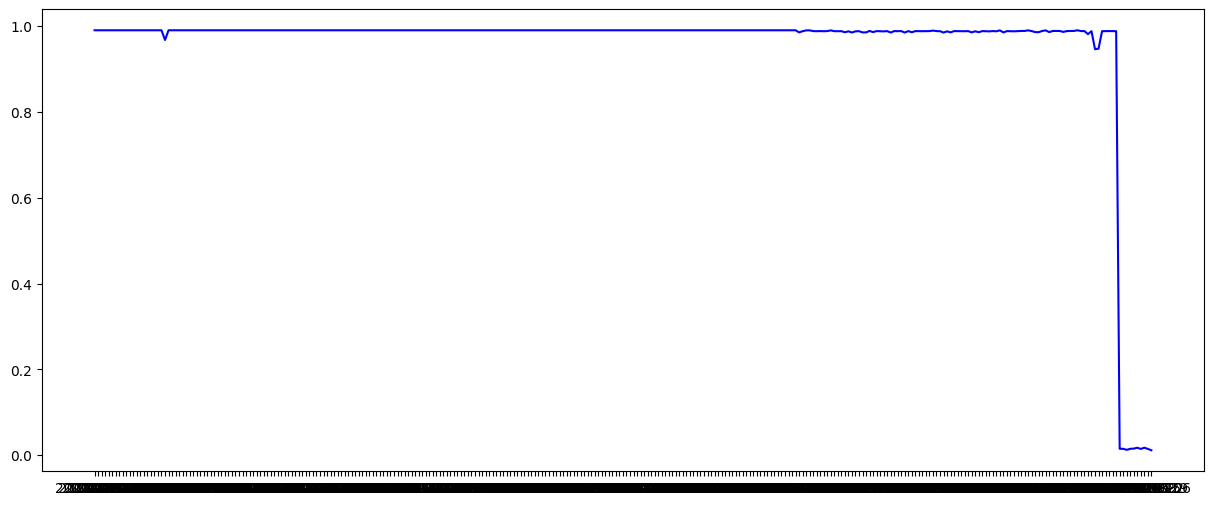

In [41]:
import matplotlib.pyplot as plt
import numpy as np

test_weeks = panel.iloc[y_test.index]["week_start"]


y_prob_series = pd.Series(y_prob, index=test_weeks)


y_true_series = pd.Series(y_test.values, index=test_weeks)


plt.figure(figsize=(15,6))


plt.plot(test_weeks, y_prob_series, label="Predicted event probability", color="blue")


plt.scatter(
    test_weeks[y_true_series==1],
    [1.05] * sum(y_true_series==1),
    color="red",
    marker="o",
    label="Actual event (1)"
)

plt.ylim(-0.1, 1.2)
plt.title("Next-week Event Prediction Over Time")
plt.xlabel("Week")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
